### SENTIMENT ANALYSIS 

In [1]:
#!pip install nltk

In [2]:
review = 'From the beginning of the movie, it gives the feeling the director is trying to portray something, what I mean to say that instead of the story dictating the style in which the movie should be made, he has gone in the opposite way, he had a type of move that he wanted to make, and wrote a story to suite it. And he has failed in it very badly. I guess he was trying to make a stylish movie. Any way I think this movie is a total waste of time and effort. In the credit of the director, he knows the media that he is working with, what I am trying to say is I have seen worst movies than this. Here at least the director knows to maintain the continuity in the movie. And the actors also have given a decent performance.'

In [3]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/soledadmusella/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/soledadmusella/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/soledadmusella/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

First step is Tokenization. 

In [4]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_review = tokenizer.tokenize(review)

In [5]:
print(tokenized_review)

['From', 'the', 'beginning', 'of', 'the', 'movie', 'it', 'gives', 'the', 'feeling', 'the', 'director', 'is', 'trying', 'to', 'portray', 'something', 'what', 'I', 'mean', 'to', 'say', 'that', 'instead', 'of', 'the', 'story', 'dictating', 'the', 'style', 'in', 'which', 'the', 'movie', 'should', 'be', 'made', 'he', 'has', 'gone', 'in', 'the', 'opposite', 'way', 'he', 'had', 'a', 'type', 'of', 'move', 'that', 'he', 'wanted', 'to', 'make', 'and', 'wrote', 'a', 'story', 'to', 'suite', 'it', 'And', 'he', 'has', 'failed', 'in', 'it', 'very', 'badly', 'I', 'guess', 'he', 'was', 'trying', 'to', 'make', 'a', 'stylish', 'movie', 'Any', 'way', 'I', 'think', 'this', 'movie', 'is', 'a', 'total', 'waste', 'of', 'time', 'and', 'effort', 'In', 'the', 'credit', 'of', 'the', 'director', 'he', 'knows', 'the', 'media', 'that', 'he', 'is', 'working', 'with', 'what', 'I', 'am', 'trying', 'to', 'say', 'is', 'I', 'have', 'seen', 'worst', 'movies', 'than', 'this', 'Here', 'at', 'least', 'the', 'director', 'knows

In [6]:
fdist = FreqDist(tokenized_review)
print(fdist)

<FreqDist with 78 samples and 145 outcomes>


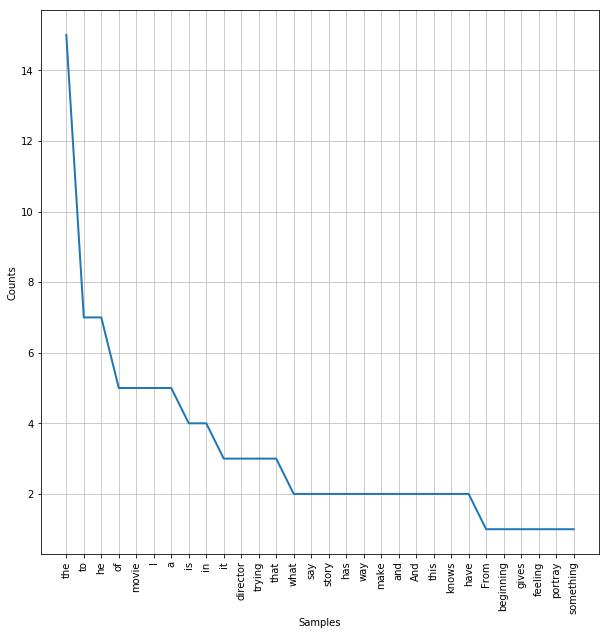

In [7]:
plt.figure(figsize=(10,10))
fdist.plot(30)

In [8]:
# La Farola example review

In [9]:
la_farola_review = "This place is super busy and you should book a table. We didn’t but we were lucky enough that they had space for us. Originally we were going to sit at the central table but these are bar stools and when staff saw that I was quite heavily pregnant they gave us a table of our own which was very kind.I’ve wanted to try the food here for a while as it is always packed in here and it was really good. We ordered a selection of plates and there are larger dishes like paella available too. The pig cheeks were absolutely delicious and we ordered another plate of them.Hopefully this place will be up and running again after lockdown and we’ll be able to enjoy the food in the sunshine."

In [10]:
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_review_la_farola = tokenizer.tokenize(la_farola_review)

In [11]:
print(tokenized_review_la_farola)

['This', 'place', 'is', 'super', 'busy', 'and', 'you', 'should', 'book', 'a', 'table', 'We', 'didn', 't', 'but', 'we', 'were', 'lucky', 'enough', 'that', 'they', 'had', 'space', 'for', 'us', 'Originally', 'we', 'were', 'going', 'to', 'sit', 'at', 'the', 'central', 'table', 'but', 'these', 'are', 'bar', 'stools', 'and', 'when', 'staff', 'saw', 'that', 'I', 'was', 'quite', 'heavily', 'pregnant', 'they', 'gave', 'us', 'a', 'table', 'of', 'our', 'own', 'which', 'was', 'very', 'kind', 'I', 've', 'wanted', 'to', 'try', 'the', 'food', 'here', 'for', 'a', 'while', 'as', 'it', 'is', 'always', 'packed', 'in', 'here', 'and', 'it', 'was', 'really', 'good', 'We', 'ordered', 'a', 'selection', 'of', 'plates', 'and', 'there', 'are', 'larger', 'dishes', 'like', 'paella', 'available', 'too', 'The', 'pig', 'cheeks', 'were', 'absolutely', 'delicious', 'and', 'we', 'ordered', 'another', 'plate', 'of', 'them', 'Hopefully', 'this', 'place', 'will', 'be', 'up', 'and', 'running', 'again', 'after', 'lockdown', 

In [12]:
fdist = FreqDist(tokenized_review_la_farola)
print(fdist)

<FreqDist with 95 samples and 136 outcomes>


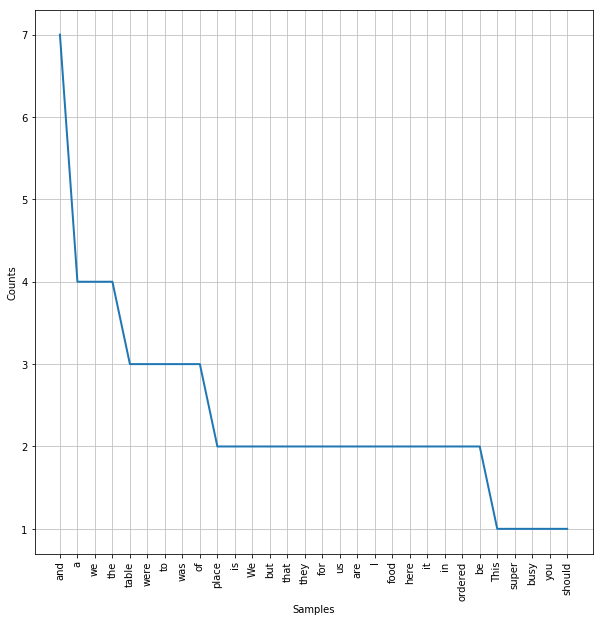

In [13]:
plt.figure(figsize=(10,10))
fdist.plot(30)

## STOPWORD REMOVAL

In [14]:
# remove semantically meaningless words

In [15]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'have', 'there', 'how', 'until', 'than', 'yourself', 'weren', 'now', 'some', 'against', "isn't", 'themselves', 'again', 'this', 'the', 'who', 'each', 'when', 'because', 'him', 'd', "she's", 'it', 'after', 'yours', "aren't", 'its', 'nor', 'or', 'into', 'that', 'being', 'were', 'at', "don't", 'their', 'with', 'any', 'doesn', 'but', 've', 'mustn', 'having', 'we', 'do', 'does', 'from', 'o', 'so', "that'll", 'needn', 'will', 'out', 'above', 'wasn', 'those', 'himself', 'of', 'i', 'which', 'in', 'me', 'couldn', "needn't", 'he', 'while', "haven't", 'more', "shouldn't", "you'd", 'they', 'them', 'she', "you're", 's', 'yourselves', 'll', "wouldn't", 'my', 'aren', 'these', 'theirs', 'further', 'all', 'wouldn', 'no', 'both', 'shan', 'to', 'if', "hasn't", 'hasn', 'shouldn', 'myself', 'hadn', 'where', 'you', 'for', 'is', 't', 'isn', 'same', 'didn', 'ourselves', 'am', 'our', 'whom', 'are', 'most', 'only', 'then', "weren't", 'here', 'very', 'been', 'too', "you'll", 'on', 'be', 'mightn', 'itself', 'was

In [16]:
filtered_review=[]
for word in tokenized_review_la_farola:
    if word not in stop_words:
        filtered_review.append(word)
print("Filterd Sentence:",filtered_review)

Filterd Sentence: ['This', 'place', 'super', 'busy', 'book', 'table', 'We', 'lucky', 'enough', 'space', 'us', 'Originally', 'going', 'sit', 'central', 'table', 'bar', 'stools', 'staff', 'saw', 'I', 'quite', 'heavily', 'pregnant', 'gave', 'us', 'table', 'kind', 'I', 'wanted', 'try', 'food', 'always', 'packed', 'really', 'good', 'We', 'ordered', 'selection', 'plates', 'larger', 'dishes', 'like', 'paella', 'available', 'The', 'pig', 'cheeks', 'absolutely', 'delicious', 'ordered', 'another', 'plate', 'Hopefully', 'place', 'running', 'lockdown', 'able', 'enjoy', 'food', 'sunshine']


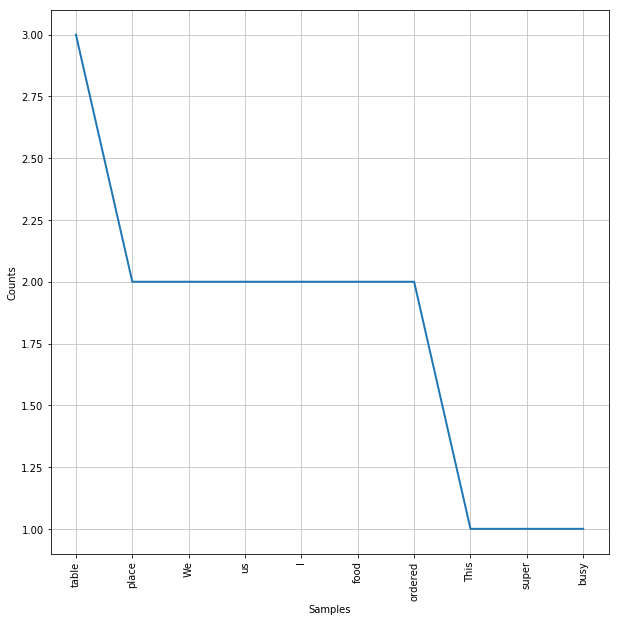

In [17]:
fdist = FreqDist(filtered_review)
plt.figure(figsize=(10,10))
fdist.plot(10)

## Stemming

Remove different variations of the same word and reduces inflection

In [18]:
from nltk.stem import PorterStemmer

In [19]:
ps = PorterStemmer()

stemmed_review=[]
for word in filtered_review:
    stemmed_review.append(ps.stem(word))

print(stemmed_review)

['thi', 'place', 'super', 'busi', 'book', 'tabl', 'We', 'lucki', 'enough', 'space', 'us', 'origin', 'go', 'sit', 'central', 'tabl', 'bar', 'stool', 'staff', 'saw', 'I', 'quit', 'heavili', 'pregnant', 'gave', 'us', 'tabl', 'kind', 'I', 'want', 'tri', 'food', 'alway', 'pack', 'realli', 'good', 'We', 'order', 'select', 'plate', 'larger', 'dish', 'like', 'paella', 'avail', 'the', 'pig', 'cheek', 'absolut', 'delici', 'order', 'anoth', 'plate', 'hope', 'place', 'run', 'lockdown', 'abl', 'enjoy', 'food', 'sunshin']


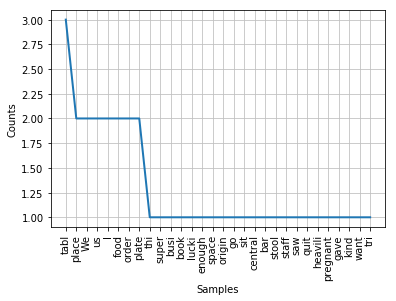

In [20]:
fdist = FreqDist(stemmed_review)
fdist.plot(30)

## Lemmatization

Lemmatization returns real words. It reduces the inflected words properly ensuring that the root word belongs to the language.

In [22]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

In [23]:
lemmatized_review=[]
for word in filtered_review:
    lemmatized_review.append(lemmatizer.lemmatize(word))

print(lemmatized_review)

['This', 'place', 'super', 'busy', 'book', 'table', 'We', 'lucky', 'enough', 'space', 'u', 'Originally', 'going', 'sit', 'central', 'table', 'bar', 'stool', 'staff', 'saw', 'I', 'quite', 'heavily', 'pregnant', 'gave', 'u', 'table', 'kind', 'I', 'wanted', 'try', 'food', 'always', 'packed', 'really', 'good', 'We', 'ordered', 'selection', 'plate', 'larger', 'dish', 'like', 'paella', 'available', 'The', 'pig', 'cheek', 'absolutely', 'delicious', 'ordered', 'another', 'plate', 'Hopefully', 'place', 'running', 'lockdown', 'able', 'enjoy', 'food', 'sunshine']


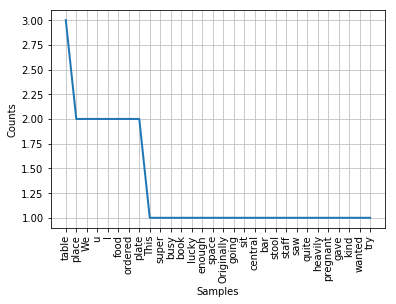

In [24]:
fdist = FreqDist(lemmatized_review)
fdist.plot(30)